# 건물 난방 효율 예측

# 환경설정

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 읽기 및 조회
 - `/mnt/elice/dataset` 디렉토리에 있는 ENB2012_data.xlsx 파일을 읽어오세요.
 - 상위 5개 샘플(행) 조회

In [5]:
# 코드를 입력해 주세요
df = pd.read_excel('/mnt/elice/dataset/ENB2012_data.xlsx')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


 - 샘플과 특성 개수 확인 (shape)

In [6]:
# 코드를 입력해 주세요
df.shape

(768, 10)

 - 아래 열 이름을 참고하여 df의 열 이름을 변경하세요.
 - ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height', 'orientation', 'glazing_area', 'glazing_area_distribution', 'heating_load', 'cooling_load']

In [7]:
# 코드를 입력해 주세요
df.columns = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height',
                'orientation', 'glazing_area', 'glazing_area_distribution', 'heating_load', 'cooling_load']
df

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


 - 정보를 조회하세요

In [8]:
# 코드를 입력해 주세요
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   relative_compactness       768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   overall_height             768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   heating_load               768 non-null    float64
 9   cooling_load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


## 결측치 처리
 - 결측치를 조회하세요.

In [9]:
# 코드를 입력해 주세요
df.isna().sum()

relative_compactness         0
surface_area                 0
wall_area                    0
roof_area                    0
overall_height               0
orientation                  0
glazing_area                 0
glazing_area_distribution    0
heating_load                 0
cooling_load                 0
dtype: int64

## 데이터 분석
 - df.hist()를 이용하여 히스토그램을 출력하세요.
 - hist의 옵션으로 figsize=(15,15), bins=5을 적용하세요.

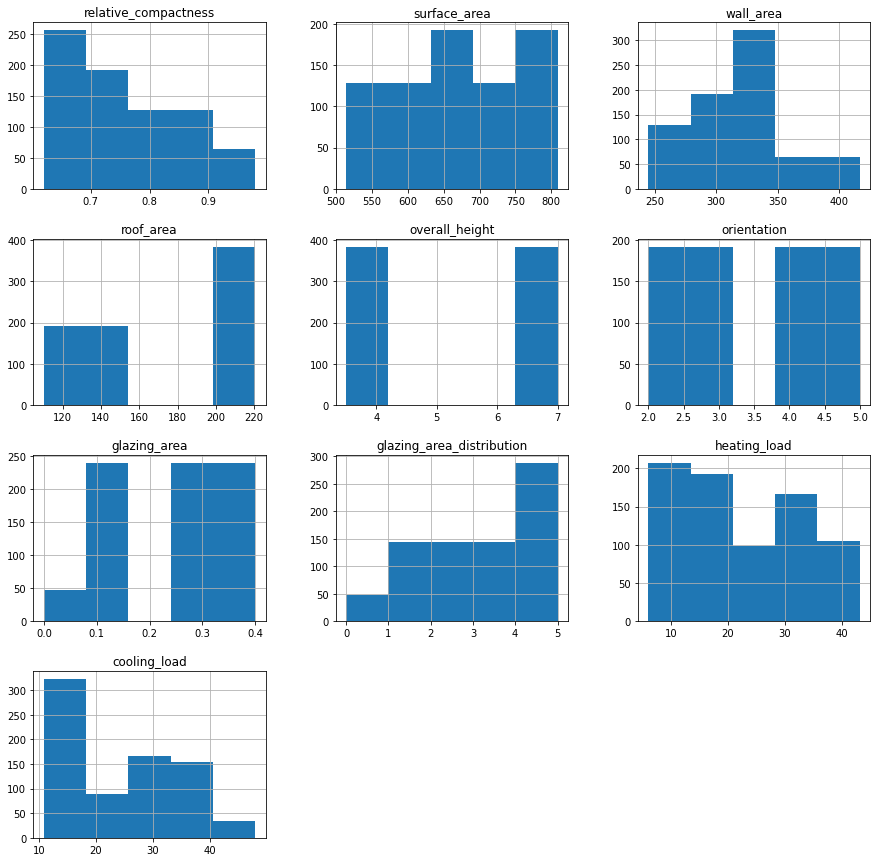

In [10]:
# 코드를 입력해 주세요
df.hist(figsize=(15, 15), bins=5) 
plt.show()

 - 각 열의 이상치 존재 여부를 확인하기 위해 boxplot를 그려보세요.

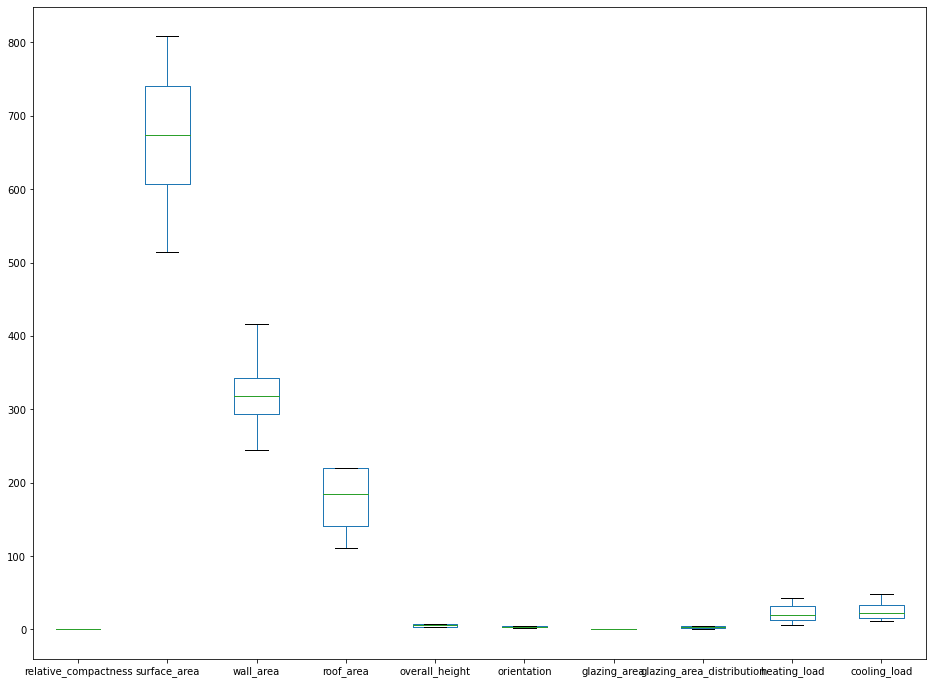

In [11]:
# 코드를 입력해 주세요
df.plot(kind='box', figsize=(16,12))
plt.show()

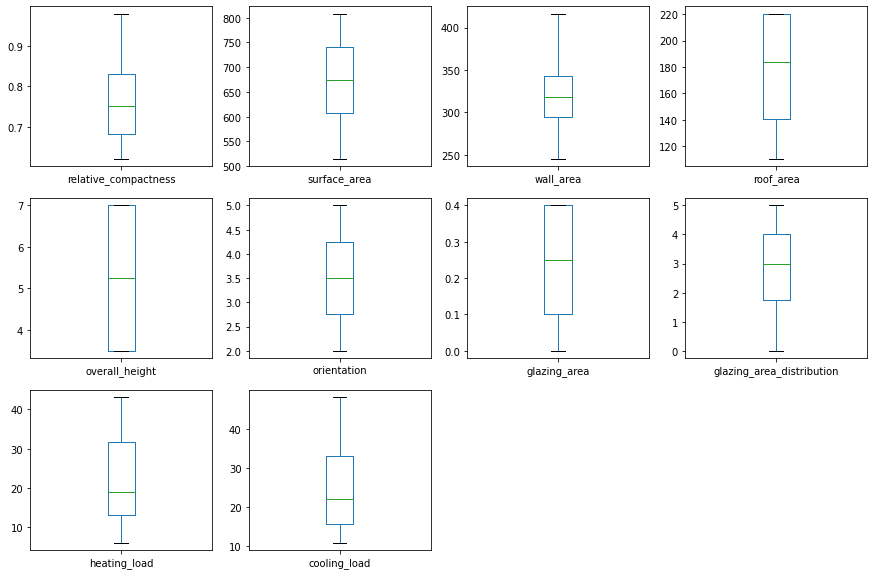

In [12]:
df.plot(kind='box', figsize=(15,10), subplots=True, layout=(3, 4))
plt.show()

 - 각 열 별 상관 관계를 출력하세요.
   - 반올림 함수를 이용하여 소수점 셋째자리까지만 출력하세요.

In [14]:
# 코드를 입력해 주세요
df.corr().round(3)

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
relative_compactness,1.000,-0.992,-0.204,-0.869,0.828,0.000,0.000,0.000,0.622,0.634
surface_area,-0.992,1.000,0.196,0.881,-0.858,0.000,0.000,-0.000,-0.658,-0.673
wall_area,-0.204,0.196,1.000,-0.292,0.281,0.000,-0.000,0.000,0.456,0.427
roof_area,-0.869,0.881,-0.292,1.000,-0.973,0.000,-0.000,-0.000,-0.862,-0.863
overall_height,0.828,-0.858,0.281,-0.973,1.000,0.000,0.000,0.000,0.889,0.896
orientation,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,-0.003,0.014
glazing_area,0.000,0.000,-0.000,-0.000,0.000,0.000,1.000,0.213,0.270,0.208
glazing_area_distribution,0.000,-0.000,0.000,-0.000,0.000,0.000,0.213,1.000,0.087,0.051
heating_load,0.622,-0.658,0.456,-0.862,0.889,-0.003,0.270,0.087,1.000,0.976
cooling_load,0.634,-0.673,0.427,-0.863,0.896,0.014,0.208,0.051,0.976,1.000


 - 각 열 별 상관 관계 값을 히트맵으로 시각화하세요.
 - 컬러맵은 Greens, 값은 소수점 둘째자리까지 출력하세요.

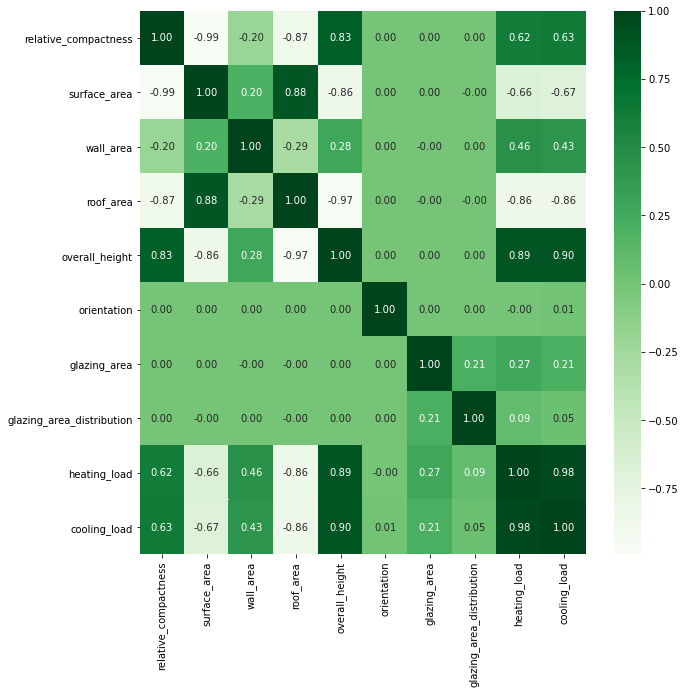

In [15]:
# 코드를 입력해 주세요
# 위에서 계산한 컬럼별 상관 관계를 heatmap으로 시각화하세요.
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='Greens', annot=True, fmt='.2f')
plt.show()

## 특성 공학
 - 종속 변수 headting load와 cooling load를 더해서 load 열을 생성하세요

In [16]:
# 코드를 입력해 주세요
df['load'] = df['heating_load'] + df['cooling_load']
df

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load,load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,36.88
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,36.88
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,36.88
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,36.88
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,49.12
...,...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40,39.28
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88,33.42
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11,33.55
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61,33.09


#### 분산(표준편차)이 0인 열이 있는지 확인하세요.

In [17]:
# 코드를 입력해 주세요
df.var()

relative_compactness            0.011189
surface_area                 7759.163842
wall_area                    1903.269883
roof_area                    2039.963060
overall_height                  3.066493
orientation                     1.251630
glazing_area                    0.017748
glazing_area_distribution       2.405476
heating_load                  101.812216
cooling_load                   90.502983
load                          379.663465
dtype: float64

#### 상관관계가 0.97 이상인 특성들이 있는지 확인하세요.
 - relative_compactness와 surface_area의 열 별 상관관계를 소수점 셋째자리까지 출력하세요.

In [18]:
# 코드를 입력해 주세요
np.round(df.corr()[['relative_compactness', 'surface_area']], 3)

,relative_compactness,surface_area
relative_compactness,1.000,-0.992
surface_area,-0.992,1.000
wall_area,-0.204,0.196
roof_area,-0.869,0.881
overall_height,0.828,-0.858
orientation,0.000,0.000
glazing_area,0.000,0.000
glazing_area_distribution,0.000,-0.000
heating_load,0.622,-0.658
cooling_load,0.634,-0.673


 - roof_area와 overall_height의 열 별 상관관계를 소수점 셋째자리까지 출력하세요.

In [19]:
# 코드를 입력해 주세요
np.round(df.corr()[['roof_area', 'overall_height']], 3)

,roof_area,overall_height
relative_compactness,-0.869,0.828
surface_area,0.881,-0.858
wall_area,-0.292,0.281
roof_area,1.000,-0.973
overall_height,-0.973,1.000
orientation,0.000,0.000
glazing_area,-0.000,0.000
glazing_area_distribution,-0.000,0.000
heating_load,-0.862,0.889
cooling_load,-0.863,0.896


 - surface_area에 따른 load의 변화를 lineplot을 이용하여 overall_height 별로 시각화하세요.
   * sns.lineplot(x= , y=, data=df)

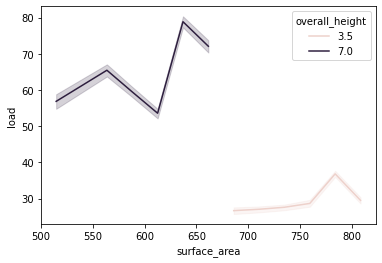

In [20]:
# 코드를 입력해 주세요
sns.lineplot(x='surface_area', y='load', hue='overall_height', data=df)
plt.show()

 - overall_height 별 샘플 수를 countplot으로 시각화하세요.
   * sns.countplot(x= , data=df)

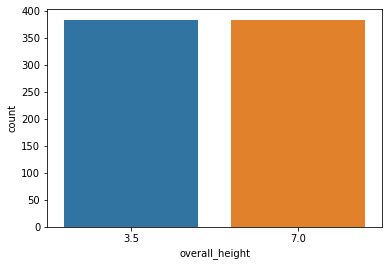

In [21]:
# 코드를 입력해 주세요
sns.countplot(x='overall_height', data=df)
plt.show()

 - overall_height 별 load의 값의 평균을 barplot으로 시각화하세요.
   * sns.barplot(x= , y= , data=df)


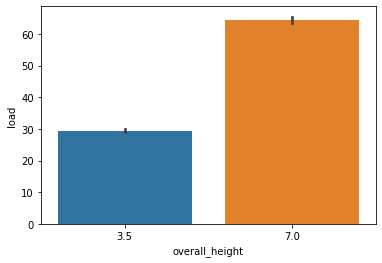

In [22]:
# 코드를 입력해 주세요
sns.barplot(x='overall_height', y='load', data=df)
plt.show()

## 학습에 사용할 열 선택
 - Y = load 열
 - X = load, heating_load, cooling_load, relative_compactness, roof_area를 제외한 나머지 열

In [23]:
# 제외할 특성은 주석처리하세요.
features = [
    #'relative_compactness', 
    'surface_area', 
    'wall_area', 
    #'roof_area',
    'overall_height',
    #'orientation',
    'glazing_area',
    'glazing_area_distribution',
]

In [24]:
# 코드를 입력해 주세요
# X와 Y를 분리하세요.
X = df[features]
Y = df['load']

 - X의 상위 5개 행과 shape을 출력하세요.

In [25]:
# 코드를 입력해 주세요
display(X.head())
X.shape

,surface_area,wall_area,overall_height,glazing_area,glazing_area_distribution
0,514.5,294.0,7.0,0.0,0
1,514.5,294.0,7.0,0.0,0
2,514.5,294.0,7.0,0.0,0
3,514.5,294.0,7.0,0.0,0
4,563.5,318.5,7.0,0.0,0


(768, 5)

 - Y의 상위 5개 행과 shape을 출력하세요.

In [26]:
# 코드를 입력해 주세요
display(Y.head())
Y.shape

0    36.88
1    36.88
2    36.88
3    36.88
4    49.12
Name: load, dtype: float64

(768,)

## 데이터 분할
 - 데이터를 학습 및 평가 데이터로 분할하세요.
 - 분할 비율은 75:25입니다.
 - random_state=0으로 설정하세요.

In [27]:
# 코드를 입력해 주세요
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0)

 - 분할된 데이터의 shape을 출력하세요.

In [28]:
print('X Train Shape : ', x_train.shape)
print('X Test Shape : ', x_test.shape)
print('Y Train Shape : ', y_train.shape)
print('Y Test Shape : ', y_test.shape)

X Train Shape :  (576, 5)
X Test Shape :  (192, 5)
Y Train Shape :  (576,)
Y Test Shape :  (192,)


## 모델 생성 및 학습
 - LinearRegression 모델을 이용하여 모델링 후, 학습 및 평가 데이터의 R-squared 지표를 출력하세요.

In [29]:
# 코드를 입력해 주세요
# 분할된 데이터를 LinearRegression으로 모델링 후 R squared를 출력하세요
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.9078998522153225, 0.9022865471270877)

 - 학습된 모델의 회귀 계수와 절편을 출력하세요.

In [30]:
# 코드를 입력해 주세요
model.coef_, model.intercept_

(array([2.84849662e-02, 6.59589856e-02, 1.07202002e+01, 3.42050968e+01,
        1.84472149e-01]),
 -58.02589560961214)

## 모델 예측 및 평가
 - 전체 X 데이터의 예측 결과를 출력하세요.

In [31]:
# 코드를 입력해 주세요
pred = model.predict(X)
pred

array([51.06296258, 51.06296258, 51.06296258, 51.06296258, 54.07472107,
       54.07472107, 54.07472107, 54.07472107, 53.15660759, 53.15660759,
       53.15660759, 53.15660759, 55.47048441, 55.47048441, 55.47048441,
       55.47048441, 57.78436123, 57.78436123, 57.78436123, 57.78436123,
       63.33022834, 63.33022834, 63.33022834, 63.33022834, 15.19544333,
       15.19544333, 15.19544333, 15.19544333, 17.50932015, 17.50932015,
       17.50932015, 17.50932015, 19.82319696, 19.82319696, 19.82319696,
       19.82319696, 22.13707378, 22.13707378, 22.13707378, 22.13707378,
       24.4509506 , 24.4509506 , 24.4509506 , 24.4509506 , 26.76482742,
       26.76482742, 26.76482742, 26.76482742, 54.66794441, 54.66794441,
       54.66794441, 54.66794441, 57.6797029 , 57.6797029 , 57.6797029 ,
       57.6797029 , 56.76158942, 56.76158942, 56.76158942, 56.76158942,
       59.07546624, 59.07546624, 59.07546624, 59.07546624, 61.38934306,
       61.38934306, 61.38934306, 61.38934306, 66.93521017, 66.93

 - 예측 결과를 각load_pred로 df에 추가하세요.

In [32]:
# 코드를 입력해 주세요
df['load_pred'] = pred
df

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load,load,load_pred
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,36.88,51.062963
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,36.88,51.062963
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,36.88,51.062963
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,36.88,51.062963
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,49.12,54.074721
...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40,39.28,39.055350
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88,33.42,41.369227
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11,33.55,41.369227
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61,33.09,41.369227


 - 실제 냉난방 로드와 예측 로드의 R-squared, MSE, MAE를 각각 출력하세요.

In [33]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print('Load')
print('R squared : ', r2_score(df['load'], df['load_pred']))
print('Mean Squared Error: ', mean_squared_error(df['load'], df['load_pred']))
print('Mean Absolute Error: ', mean_absolute_error(df['load'], df['load_pred']))

Load
R squared :  0.906478611301612
Mean Squared Error:  35.460421866624074
Mean Absolute Error:  4.3704480370181855
